In [66]:
#!pip install pandas numpy matplotlib seaborn matplotlib plotly plotly_express scikit-learn


In [67]:
# Import Packages
import pandas as pd # pandas import to create dataframes to store dataset from file and perform data manipulation (GeeksforGeeks, 2025a; (NumFOCUS Inc, 2025))
import numpy as np# numpy import to create multidimensional arrays and perform mathematical operations (NumPy team, 2025; Jeremiah, 2023)
import seaborn as sns # seaborn import to for data visualization and statistical graphics (Waskom, 2024)
import matplotlib.pyplot as plt# matplotlib import for data visualization and plotting (GeeksforGeeks, 2025b;Matplotlib, 2025)
import sklearn #  sklearn import provides machine learning algorithms and tools for data preprocessing (Great Learning, 2025; Scikit-Learn, 2025)
from sklearn.preprocessing import LabelEncoder

#matplotlib inline to display plots in the notebook
%matplotlib inline

### **Data Collection**

In [68]:
# Loading data from CSV file with pandas to create a dataframe
dfInsure = pd.read_csv('input/insurance.csv')
# Displaying the first 5 rows of the dataframe to understand the data structure and contents
dfInsure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
# Print the Shape of the DataFrame (rows and columns)
# The shape will serve as a reference for the number of records and features in the dataset to validate data is being tranformed as intended 
# and no rows are being lost is lost 
dfInsure.shape 


(1338, 7)

The dataset contains 1338 samples/ features and 7 features (1338, 7).
This give us a starting point and benchmark to refer back to as we go about tranforming the dataset.


### **Data Cleaning**

In [ ]:
# print the datatypes of the DataFrame to understand the data types of each column
# The datatypes will also help to identify if any data type conversions are needed for analysis and machine learning tasks
dfInsure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset has 7 columns or features, made up of ints, floats and objects. 
- 2 of the columns, age and children are int datatypes suitible as input for machine learning algorithms 
- 2 of the columns, charges and bmi are floats datatypes suitible as input for machine learning algorithms 
- 3 of the columns datatypes are objects or string values which need to be converted to numerical values for to be sued as input for the machine learning algorithms 


In [71]:
print("Num of null values in DS=>")
# pandas isnull() method to check for null values in the DataFrame
# The null values will help to identify any missing data that may need to be addressed before analysis and machine learning tasks
dfInsure.isnull().sum()


Num of null values in DS=>


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
print("Num of duplicates values in DS=>")
# pandas duplicated() method to check for duplicate rows in the DataFrame
# The duplicates will help to identify any redundant data that may need to be addressed before analysis and machine learning tasks
duplicates = dfInsure.duplicated()
print(duplicates.sum())

# pandas drop_duplicates() method to remove duplicate rows from the DataFrame
# The drop duplicates will help to clean the data and ensure that only unique records are retained for analysis and machine learning tasks

print("The duplicates values in DS=>")
# for loop to iterate over the duplicates and print the duplicate rows
for i in range(len(duplicates)):
    # if the duplicate value is True, print the duplicate row
    if duplicates[i] == True:
        #dup variable to store the duplicate row
        dup = dfInsure[i:i+1]
        # print the duplicate row to understand the data and identify any potential issues with the data
        print(dup)

Num of duplicates values in DS=>
1
The duplicates values in DS=>
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [73]:
# remove duplicates, inplace to make the modification directly to the original DataFrame
dfInsure.drop_duplicates(inplace=True)
print("Num of duplicates values in DS after removing duplicates=>")
# call the duplicated() method again to check for duplicate rows have been effectively removed from the DataFrame
duplicates = dfInsure.duplicated()
# print the number of duplicate rows after removing duplicates 
print(duplicates.sum()) 

Num of duplicates values in DS after removing duplicates=>
0


In [74]:
#print the shape of the DataFrame after removing to ensure transformation is correct
dfInsure.shape

(1337, 7)

In [75]:
# Count Unique Values in Each Column
# this further helps to gauge the data quality and identify any potential issues with the data.
# such as binnary values, categorical values containg more than two unique values, and numerical values with a large range of unique values.
unique_counts = dfInsure.nunique()
print("Unique value counts for each column:")
# print the unique counts for each column to understand the data distribution and identify any potential issues with the data
print(unique_counts)

Unique value counts for each column:
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


### **Data Transformation**

In [76]:
# instantiate the LabelEncoder class to convert categorical variables into numerical values
# This is to prepare the data for machine learning algorithms that require numerical input
encoder = LabelEncoder()
dfInsure.sex = encoder.fit_transform(dfInsure.sex.astype(str))
dfInsure.smoker = encoder.fit_transform(dfInsure.smoker.astype(str))
dfInsure.region = encoder.fit_transform(dfInsure.region.astype(str))
# d`fInsure.head() to display the first 5 rows of the DataFrame to understand the data structure and contents after encoding categorical variables
# Display the first 5 rows of the DataFrame to understand the data structure and contents after encoding categorical variables
dfInsure.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [77]:
# dispay data types of the DataFrame to understand the data types of each column after encoding categorical variables
# to verify that the categorical variables have been successfully converted to numerical values
dfInsure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [78]:
# Confirm the shape of the DataFrame after encoding categorical variables to ensure that the transformation is correct
# The shape will serve as a reference for the number of records and features in the dataset to validate data is being tranformed as intended
dfInsure.shape

(1337, 7)

In [82]:
# print the descriptive statistics of the DataFrame to understand the distribution of numerical features
# The summary statistics will help to identify any outliers or anomalies in the data that may need to be 
# addressed before analysis and machine learning tasks
dfNumerics = dfInsure.loc[:, ['age', 'bmi', 'children', 'charges']]
# print the descriptive statistics of the DataFrame to understand the distribution of numerical features
dfNumerics.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


This is the first step to understanding the distribution, central tendency and the variability for each features within the dataset (Bhandari, 2020). 
#### **Age:** 
The mean 39.20 is very close to the median 39, this indicates that there is symmetrical distribution in the spread of data. The std of 14.0 is a moderate value compared to the features mean, implying that there is moderate variblity within the spread of age in the dataset. This variblity is confirmed by the 25th and 75th percentile which shows that 50% of members age falling between 27 and 64 years old. 
#### **BMI:** 
The mean 30.6 is very close to the median 30.4, this indicates that there is symmetrical distribution in the spread of data. The std of 6.09 is a low value compared to the features mean, implying that there is low variblity within the spread of dataset feature. This variblity is confirmed by the 25th and 75th percentile which shows that 50% of members BMI is between 26.29 and 34.69. The diffence between the 75th percentile of 34.69 and max value 53.1 futher suggests the pressence of outliers in the feature. 
#### **Children:** 
The mean 1.09 is higher that the median 1.0, this indicates that the distribution of data is postivly skewed, most likly due to the max value of 5 children for a memeber. The std of 1.2 is a moderate value compared to the features mean, implying that there is moderate variblity within the spread of dataset feature. This variblity is confirmed by the 25th and 75th percentile which shows that 50% of members number of children is between 0 and . 
#### **Charge:** 
The mean $13 270 is much higher than the median charge $9 382, this indicates that the distribution of data is postivly skewed, most likly due to the max value of $63 770. The std of $12 110 is a larger value compared to the features mean, implying that there is high variblity within the spread of insuarnce charges. This variblity is confirmed by the 25th and 75th percentile which shows that 50% of members pay charges between $4 740 and $16 639. The larger diffence between the 75th percentile and max value futher suggests the pressence of outliers in the feature. 

## **Bi-variate and  Multivariate Analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

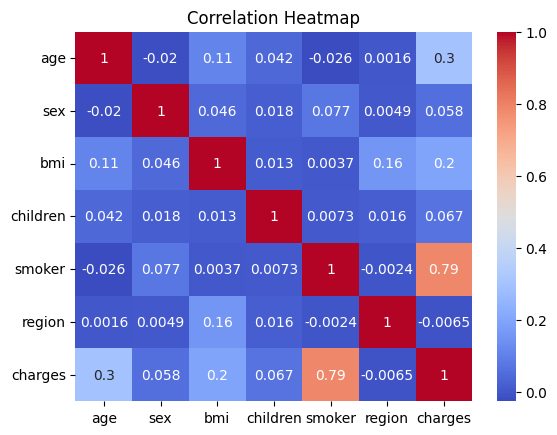

In [ ]:

# assigning variable dfCorr to the correlation matrix of the DataFrame
# pandas corr() method to calculate the correlation between numerical features in the DataFrame
# The correlation matrix will help to identify any multicollinearity issues in the data and understand the relationships between features
dfCorr = dfInsure.corr()
# seaborn heatmap() method to create a heatmap to visualize the correlation matrix
# data = dfCorr to indicate the data to be used for the heatmap
# annot=True to display the correlation values on the heatmap
# cmap='coolwarm' to specify the color map to be used for the heatmap
sns.heatmap(dfCorr, annot=True, cmap='coolwarm')
# plt.title() to set the title of the heatmap
plt.title('Correlation Heatmap')


A correlation heat map shows the correlation between all variables in a dataset. The pandas method "dataframe.corr()" is used to calculate the correlation coefficient for each variable in the dataset ((NumFOCUS Inc, 2025)) . The method returns a float between 1 and -1, indicating the correlation between the each pair of variables (NumFOCUS Inc, 2025). 1 indicates perfect correlation, 0 indicates no correlation and -1 perfect negative correlation. This visuals the matrix of correlations using the seaborn heatmap (Jain, 2024).
## Insights 
- All correlations for the pair of like variables results in 1.0, plotted on the diagional of the heatmap.
- The charges variable is positively correlated with age, bmi, and children variables. Each of these vaibles have a postive linear relationship with the target variable. Thereofore, for an increase in any one of the variables  charge will increas too. 
- The correlation heat map confirms minimal correlation between independent variables, indicating that there is no multicollinearity that will controdict the muclticollinearity assumption of linear regression.
- 0.79 highest correleation between a pair of variables. It defines a strong positive linear relationship between smoker and charges variables. 

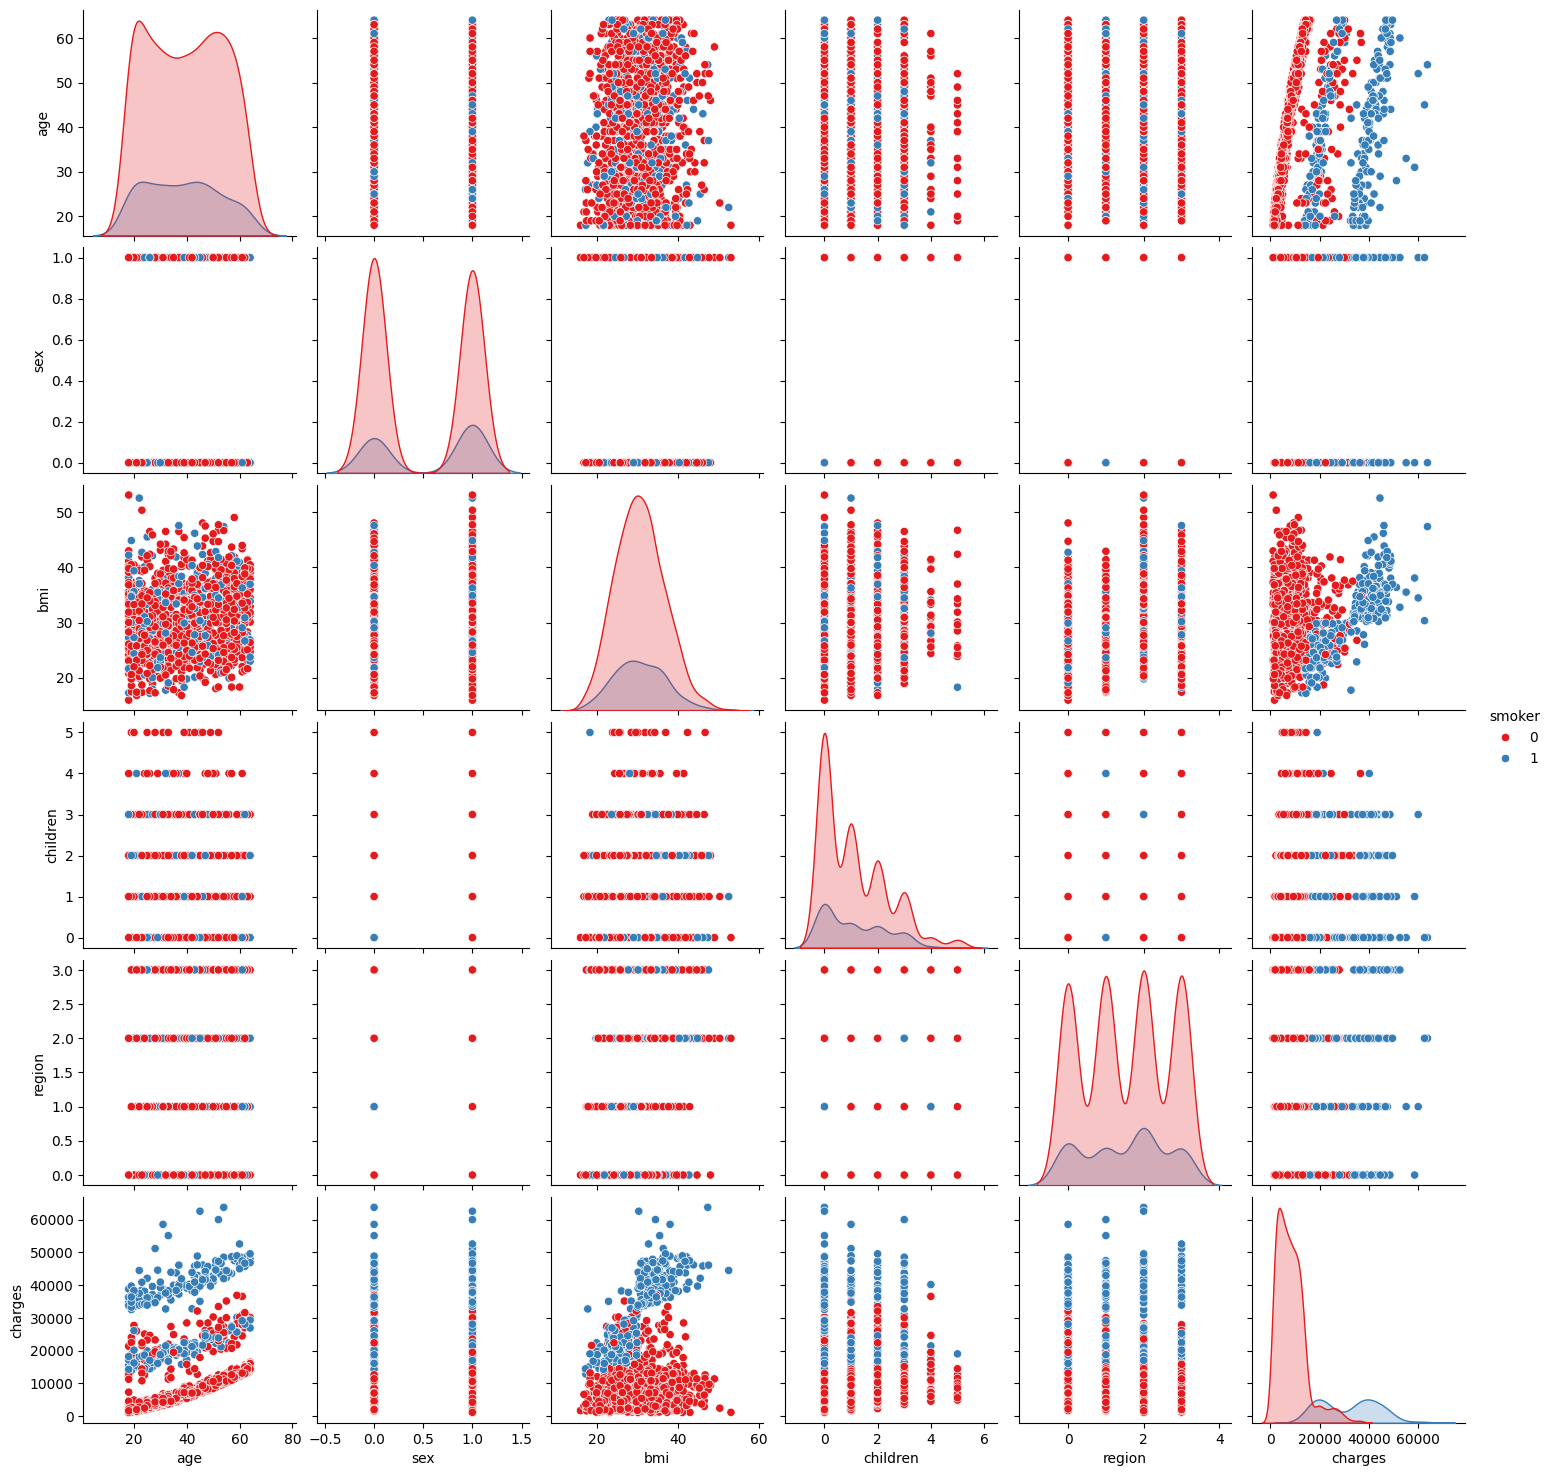

In [ ]:
# Seaborn pairplot() method to create a pair plot to visualize the relationships between features in the DataFrame according to smoker status
# hue='smoker' to set  the variable to be used for coloring the points in the pair plot
sns.pairplot(dfInsure, hue="smoker" , palette='Set1')

Above is a pairwise scatter plot for further investigate the relationships between each pair of variables. The pairwise scatter plots give a brief overview of the general trends, patterns and correlations within the dataset variables (Ahluwalia, 2024; Waskom, 2024b).

## Insights 
The above pairwise scatter plot has been created with the smoker feature as a hue, to gauge the effect or influence of smoking status on each variable as it has the highest correlations with charges.
- The diagonal plots show the distribution of a single variable. Each of the distribution plots shows that there are more non-smokers than smokers in the dataset.
- The pairwise scatter plots show a clear separation in clusters for each plot with the smoker status as the hue, orange indicating a smoker and blue indicating non-smoker. 
 - Age: The charges vs. age plot indicates that a member's charges increase with age. Higher charges are also associated with members who smoke.
 - Sex: Male (0) and female (1) members don't seem to have a difference in charges, as the distributions for both genders are similar. However, smoking status incurs higher charges.
 - BMI: The clustering in the scatter plot for this variable indicates that members with moderate and high BMI receive similar charges. The clusters that fall in the higher range of charges consist of members with moderate to high BMIs who are also smokers.
 - Childern: The distribution plot reveals that most members have 0 to 2 children. The number of children a member has does not seem to affect the insurance charges
 - Region: The region of a member seems to have little effect on the charges incurred, as the distributions for each region are very similar. However, members who are smokers across all regions tend to incur higher insurance charges.

C:\Users\User\AppData\Local\Temp\ipykernel_7776\1059394331.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dfInsure['charges'], palette='coolwarm', bins=20, kde=True)


Text(0, 0.5, 'Count')

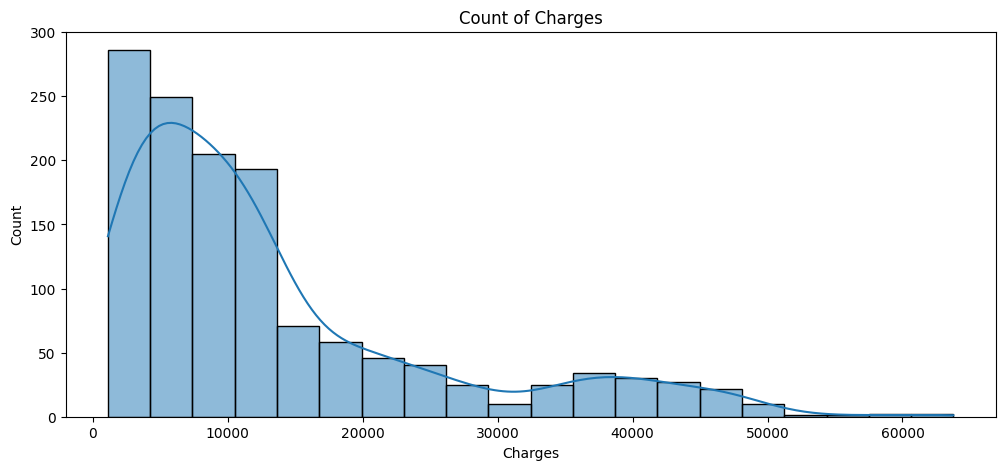

In [ ]:
# set plot size for the histogram
plt.figure(figsize=(12,5))
# seaborn histplot() method to create a histogram to visualize the distribution of the 'charges' column in the DataFrame
sns.histplot(dfInsure['charges'], palette='coolwarm', bins=20, kde=True)
plt.title('Count of Charges')
# set the x-axis and y-axis labels for the histogram
plt.xlabel('Charges')
plt.ylabel('Count')

The above historgram shows the distribution of charges,which is the target variable. The distribution for charges is right skewed,indicating that the  majority of members received relativly moderate fee. While a smaller number of members incur higher charge rate, indicated by the upper tail the curve which disorts the distribution.

Text(0.5, 1.0, 'Smoker vs Charges')

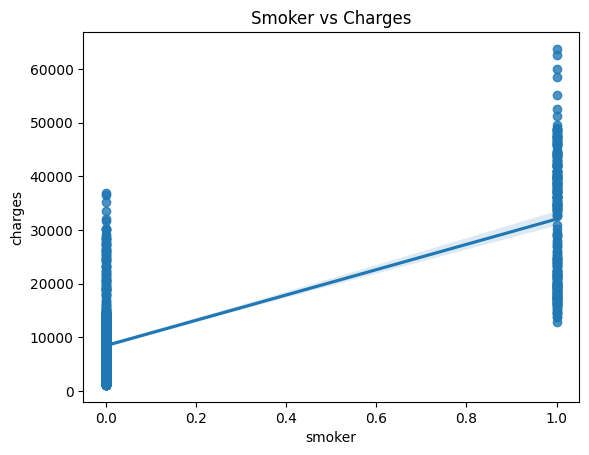

In [ ]:
# seaborn regplot() method to create a regression plot to visualize the relationship between 'age' and 'charges' in the DataFrame
sns.regplot(x='smoker', y='charges', data=dfInsure)
# plt.title() to set the title for the plot 
plt.title('Smoker vs Charges')

The plot shows a strong positive correlation between the charges to smoker status, however  the plot does not show the distribution well as it is comparing a contious variable to a binary catogory 

Text(0, 0.5, 'Smokers')

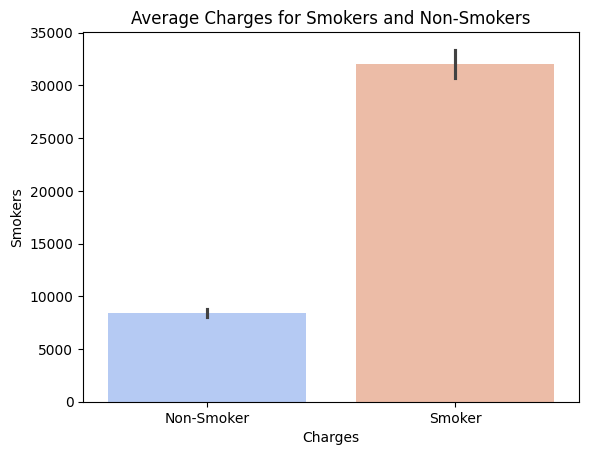

In [ ]:
# seaborn barplot() method to create a bar plot to visualize the average charges for smokers and non-smokers in the DataFrame
# data = dfInsure to indicate the data to be used for the bar plot
# x='smoker' to set  the variable to be used for the x-axis
# y='charges' to set  the variable to be used for the y-axis
graph = sns.barplot(y='charges',x='smoker',hue='smoker', data=dfInsure, palette='coolwarm')
graph.legend_.remove()
#set the x axis tick labels to replace the default numerical encoded lables
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
# set the title for the plot
plt.title('Average Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Smokers')

The barchart compares the average charges for a smoking memeber and a non-smoking memeber. The height of each bar is and indiaction of the mean charge for each group (Waskom, 2024c).
- The bar for non-smokers is lower than smokers. This indicates that non-smokers tend to incur lower charges.  
- The bar for smokers is is much higher than non-smokers. This indicates that  smokers tend to incur a higher insurance charge.  

Text(8.293854595336088, 0.5, 'Density')

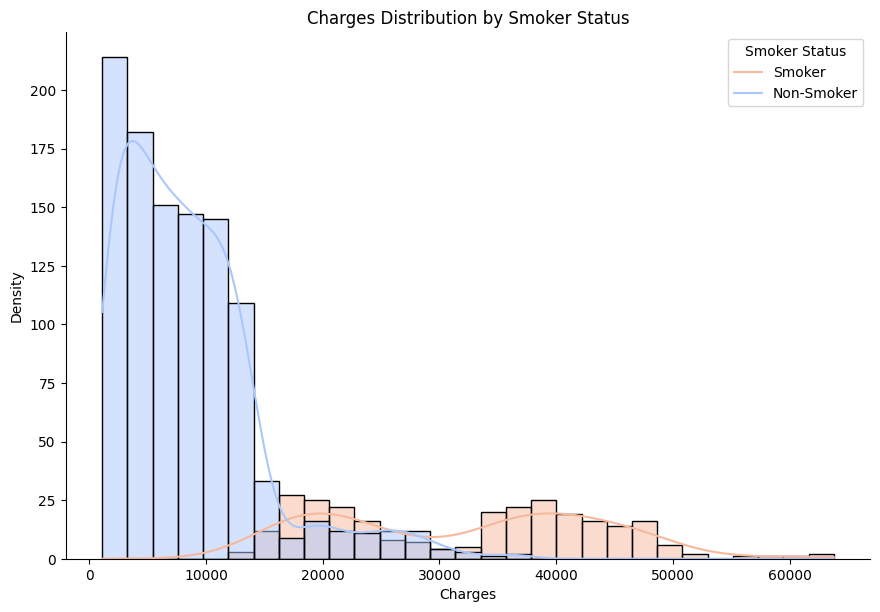

In [ ]:
# assign graph to seaborn displot() method to create a histogram with kernel density estimation (KDE) curve better to visualize the distribution of charges in the DataFrame
# x='charges' to specify the variable to be used for the x-axis
# hue='smoker' to set  the variable to be used to color the histogram bars
# fill=True to fill the area under the KDE curve
# kde=True to display the KDE curve on the histogram
# height=6 to set the the height of the plot
# aspect=1.5 to set the aspect ratio of the plot
graph = sns.displot(dfInsure, x='charges', hue='smoker',  fill=True, kde = True, height=6, aspect=1.5, palette='coolwarm')# (Waskom, 2024d)
# set the x and y axis labels  to charges and density 
graph.set_axis_labels('Charges', 'Density')
# remove the default legend from the plot
graph.legend.remove()

# set the title for the plot
plt.title('Charges Distribution by Smoker Status')
# set custom legend for the plot
plt.legend(title='Smoker Status', labels=['Smoker','Non-Smoker'])
# set the x and y axis labels for the plot
plt.xlabel('Charges')
plt.ylabel('Density')

The plot provides an indepth view of the distibition of insurance charges for both smokers and non-smokers. 
### **Smokers (Peach)**
- The plot show there are fewer members with smoking status within the dataset. The bars representing smoker, do not exceed 25 on the y-axis showing a significant difference in the count for smoking vs non-smoking members. 
- the graph shows a bimodel distibutions, with peaks approximately falling between $10,000 to $30,000 and $30,000 to $60,000. This distribition suggests that other features may have a strong contribution to a decrease in the charged insurance fee dispite smoking status (Frost, 2022). 
### **Smokers (Blue)**
- The plot show there are majority members with non-smoking status within the dataset. The bars representing non-smoker, ranges across  all values on the y-axis showing a significant difference in the count for smoking vs non-smoking mmembers. 
- the graph shows a right skewed distribution, with non-smoking members incuring charges of $1,121 (min value) to  approximately $15 000. The upper tail of the non-smoking curve does fall within higher charge rate, indiacting that there are features may have a strong contribution to a increase in the charged insurance fee dispite smoking status.  


Text(8.293854595336088, 0.5, 'Density')

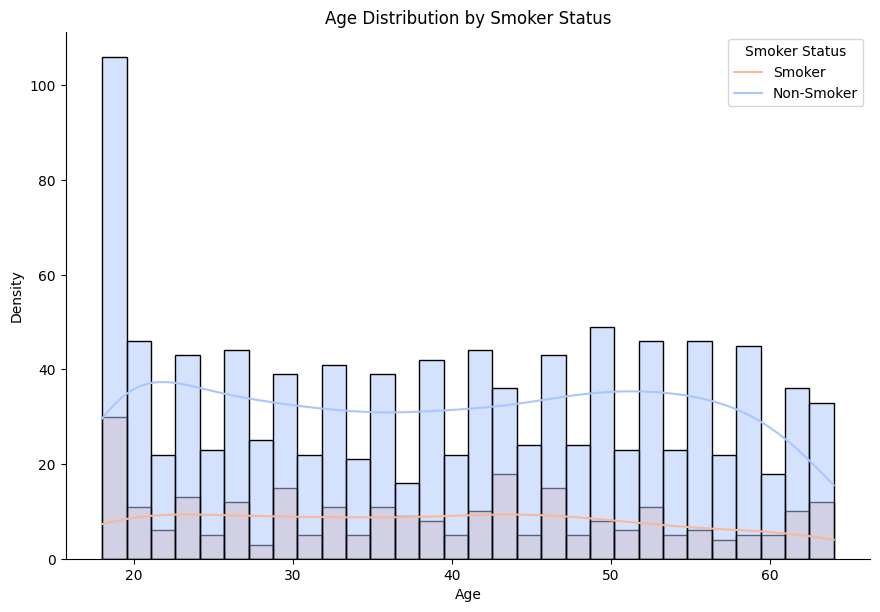

In [ ]:
# assign graph to seaborn displot() method to create a histogram with kernel density estimation (KDE) curve better to visualize the distribution of age in the DataFrame
# x='age' to set  the variable to be used for the x-axis
# hue='smoker' to set  the variable to be used to color the histogram bars
# fill=True to fill the area under the KDE curve
graph = sns.displot(dfInsure, x='age', hue='smoker',  fill=True, kde = True, height=6, aspect=1.5, palette='coolwarm', bins=30) #(Waskom, 2024c)
# set the x and y axis labels  to age and density
graph.set_axis_labels('Age', 'Density')
# remove the default legend from the plot
graph.legend.remove()
# set the title for the plot
plt.title('Age Distribution by Smoker Status')
# set custom legend for the plot
plt.legend(title='Smoker Status', labels=['Smoker','Non-Smoker'])
# set the x and y axis labels for the plot
plt.xlabel('Age')
plt.ylabel('Density')

The plot provides an indepth view of the distibition of ages of  members accoring to their smoking status.  
### **Smokers (Peach)**
- Again the plot show there are fewer  memberswith smoking status within the dataset. Though the distibition is platykurtic, this indicates there is a constiant number of smokers accross all ages (GeeksforGeeks, 2025c). 
### **Smokers (Light blue)**
- The majority members are non-smokers within the dataset. The bars representing non-smoker, ranges across all values on the y-axis showing a significant difference in the count for smoking vs non-smoking members. 
- the graph distribution is too relativly even, though there is a sligt disortion within the left tail. Members aged between 18 (min value) and approximately 19 years seem to from the dominant age group within the dataset. 


C:\Users\User\AppData\Local\Temp\ipykernel_7776\2671591462.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph2 = sns.scatterplot(y='charges', x='age',  data=dfInsure, alpha=0.5, palette='Set1', ax=ax1) #(samthebrand, 2015)


<Figure size 1500x800 with 0 Axes>

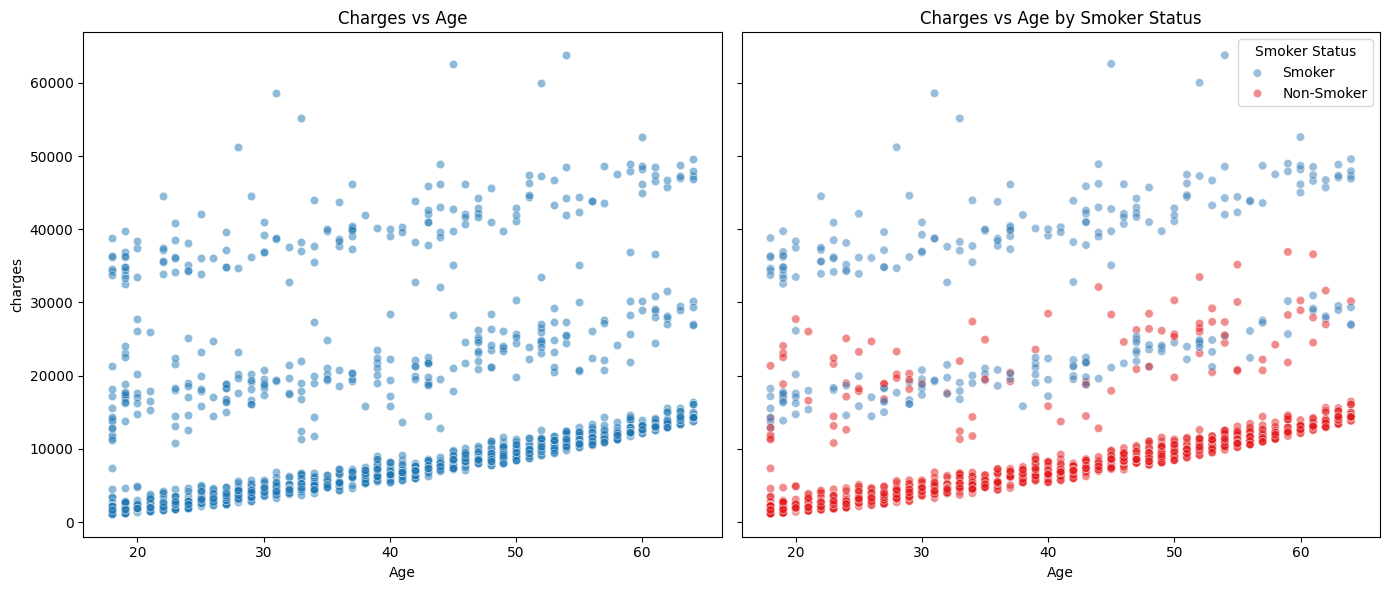

In [ ]:
# set the figure size for the plot
plt.figure(figsize=(15,8))

# create subplots to visualize the relationship between 'age' and 'charges' in the DataFrame
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True) #(samthebrand, 2015)
# assign graph to seaborn scatterplot() method to create a scatter plot to visualize the relationship between the'age' and 'charges' in the DataFrame
graph = sns.scatterplot(y='charges', x='age', hue='smoker', data=dfInsure, alpha=0.5, palette='Set1', ax=ax2) #(samthebrand, 2015)
graph2 = sns.scatterplot(y='charges', x='age',  data=dfInsure, alpha=0.5, palette='Set1', ax=ax1) #(samthebrand, 2015)

# set title for the plot
ax2.set_title('Charges vs Age by Smoker Status') #(samthebrand, 2015)
ax1.set_title('Charges vs Age') #(samthebrand, 2015)
# set a custom legend for the plot
ax2.legend(title='Smoker Status', labels=['Smoker','Non-Smoker'], loc='upper right') #(samthebrand, 2015)
# set the x and y axis labels for the plot
ax1.set_xlabel('Age') #(samthebrand, 2015)
ax2.set_xlabel('Age') #(samthebrand, 2015)
plt.ylabel('Charges') #(samthebrand, 2015)

plt.tight_layout()
plt.show()


The above two scatter plots shows the disrtibution off charges vs age.
#### **Charge vs Age**
Within the first scatter plot, there does not appears to be a linear relationship between charges 
and the age of a member but the trend is not very clear.
By highlighting the smoking status of members the  relationship become more apparent.
#### **Charge vs Age by Smoking Status**
Differentiating between smoking and non-smoking members allows for a clear trend 
to emerge. The trend shows more so infers that the relationship is between 
charges vs smoker status.


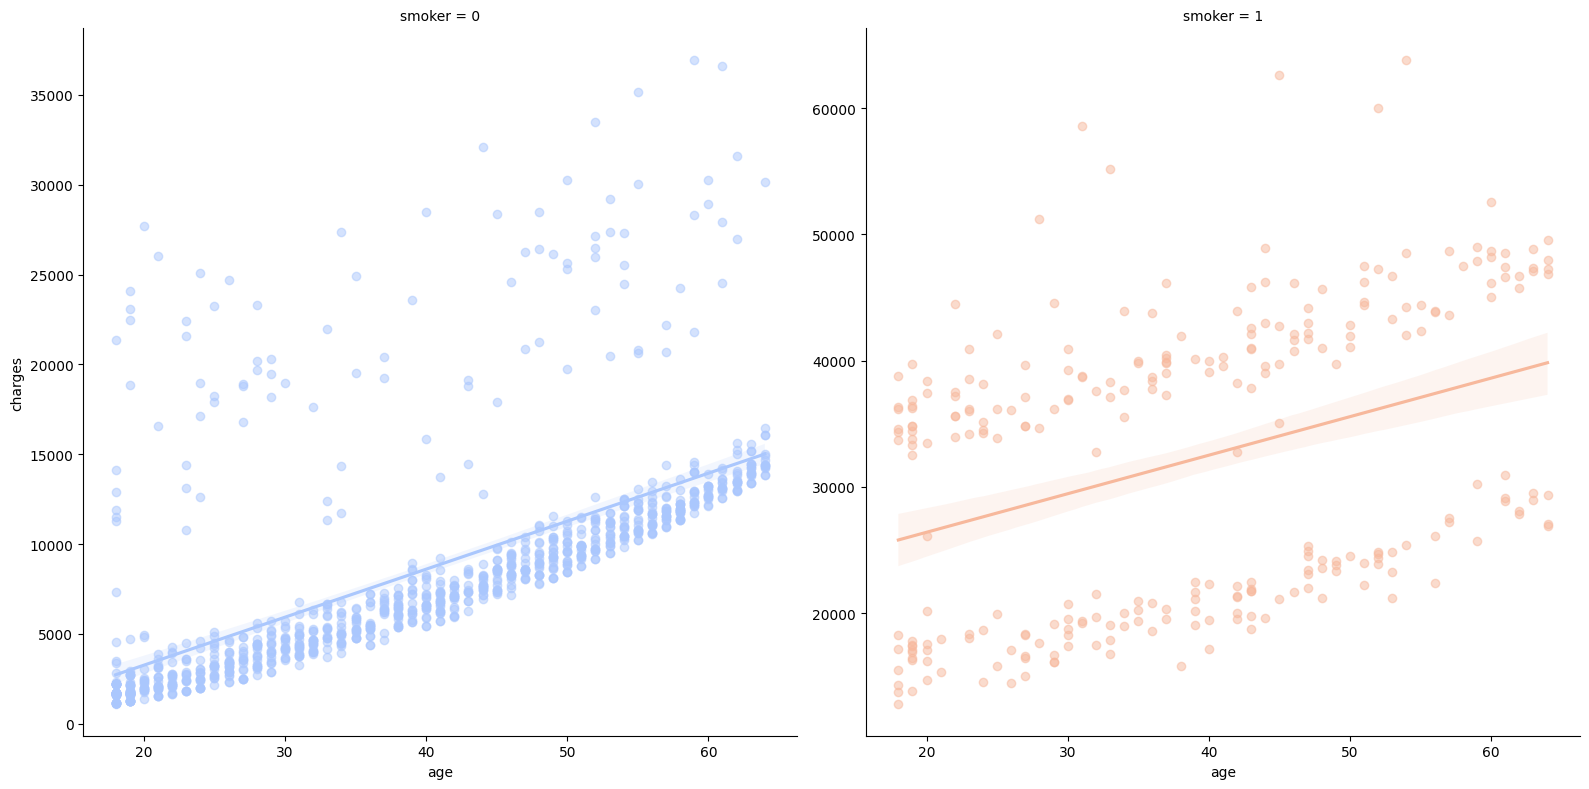

In [ ]:
# seaborn lmplot() method to create a linear regression plot to visualize the relationship between 'age' and 'charges' in the DataFrame
# col='smoker' to set  the variable to be used for creating separate subplots for each smoker status
# hue='smoker' to set  the variable to be used for coloring the points in the plot
# height=8 to set  the height of the subplots
sns.lmplot(data=dfInsure, x="age", y="charges", col="smoker",hue='smoker', height=8,  scatter_kws=dict( alpha=0.5),facet_kws=dict(sharex=False, sharey=False), palette='coolwarm') # (Waskom, 2024d)
# set the x and y axis labels for the plot

Age, as a continous value that has spread of data in the higher and lower range is sutible to elaborate the relation of chargers to smoking status.
### **Scatter plot 1: Charge vs age by Non-smoking members.**
- By plotting a regrssion line, a positive correlation between age and charges for non-smoking members. This indicates the insurnace charge for a memeber increases with their age. Therefore, younger members recieve lower rates than older members.

### **Scatter plot 2: Charge vs age by Smoking members.**
- By plotting a regrssion line, a positive correlation between age and charges for smoking members. The plot indicates the insurnace charge for a memeber increases with their age, however the rates for these members are much larger. Therefore, memebers that smoke incur higher rates young and old.

- Although the data point follow a linear trend, they are clustered seperately in the lower and upper regions of the y-axis. This sepreation implies that there are other lifestlye factors or features that cause this variation and thereby contribut to higher charge rates.
 

Text(8.293854595336088, 0.5, 'Density')

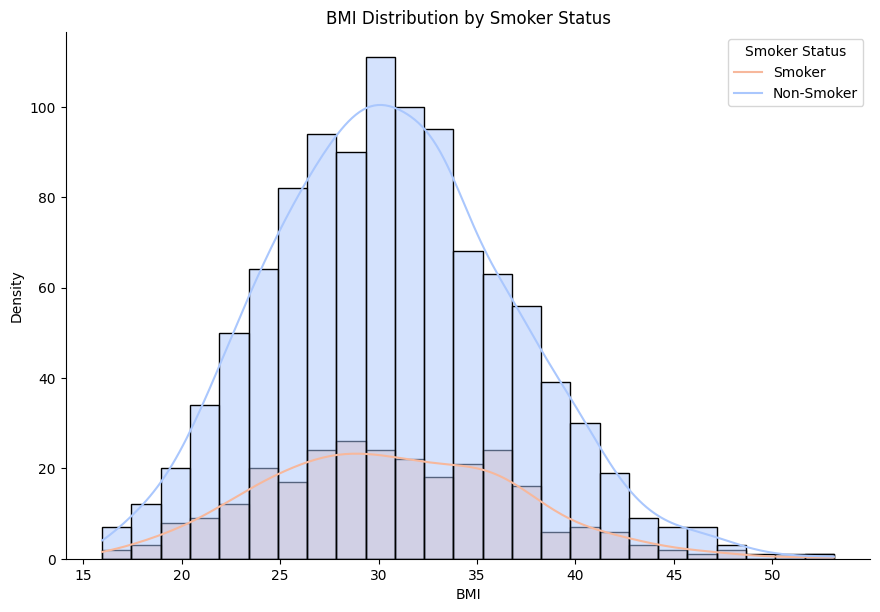

In [ ]:
# assign graph to seaborn displot() method to create a histogram with kernel density estimation (KDE) curve better to visualize the distribution of bmi in the DataFrame
# x='bmi' to set  the variable to be used for the x-axis
# hue='smoker' to specify the variable to be used to color the histogram bars
# fill=True to fill the area under the KDE curve
# kde=True to display the KDE curve on the histogram
# height=6 to set the the height of the plot
# aspect=1.5 to set the aspect ratio of the plot
graph = sns.displot(dfInsure, x='bmi', hue='smoker',  fill=True, kde = True, height=6, aspect=1.5, palette='coolwarm')# (Waskom, 2024d)
# set the x and y axis labels  to bmi and density
graph.set_axis_labels('BMI', 'Density')
# remove the default legend from the plot
graph.legend.remove()
# set the title for the plot
plt.title('BMI Distribution by Smoker Status')
# set custom legend for the plot
plt.legend(title='Smoker Status', labels=['Smoker','Non-Smoker'])
# set the x and y axis labels for the plot
plt.xlabel('BMI')
plt.ylabel('Density')

The plot provides an indepth view of the distibition of BMI for both smokers and non-smokers. 
- There are fewer members with smoking status within the dataset. The bars representing smoker, do not exceed 20 on the y-axis. 
- the graph shows a standard (bell) distribotion , this support the central tendency figures given descriptive statistics. The majorty of members have a BMI close to 30 (Mean), indicating that most members are overweight or obese (The National Heart, 2013; Bhandari, 2020b). 


C:\Users\User\AppData\Local\Temp\ipykernel_7776\4092285168.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grahp = sns.scatterplot(x='bmi', y='charges', data=dfInsure, alpha=0.5, palette='Set1') # (Waskom, 2024e)


Text(0, 0.5, 'Charges')

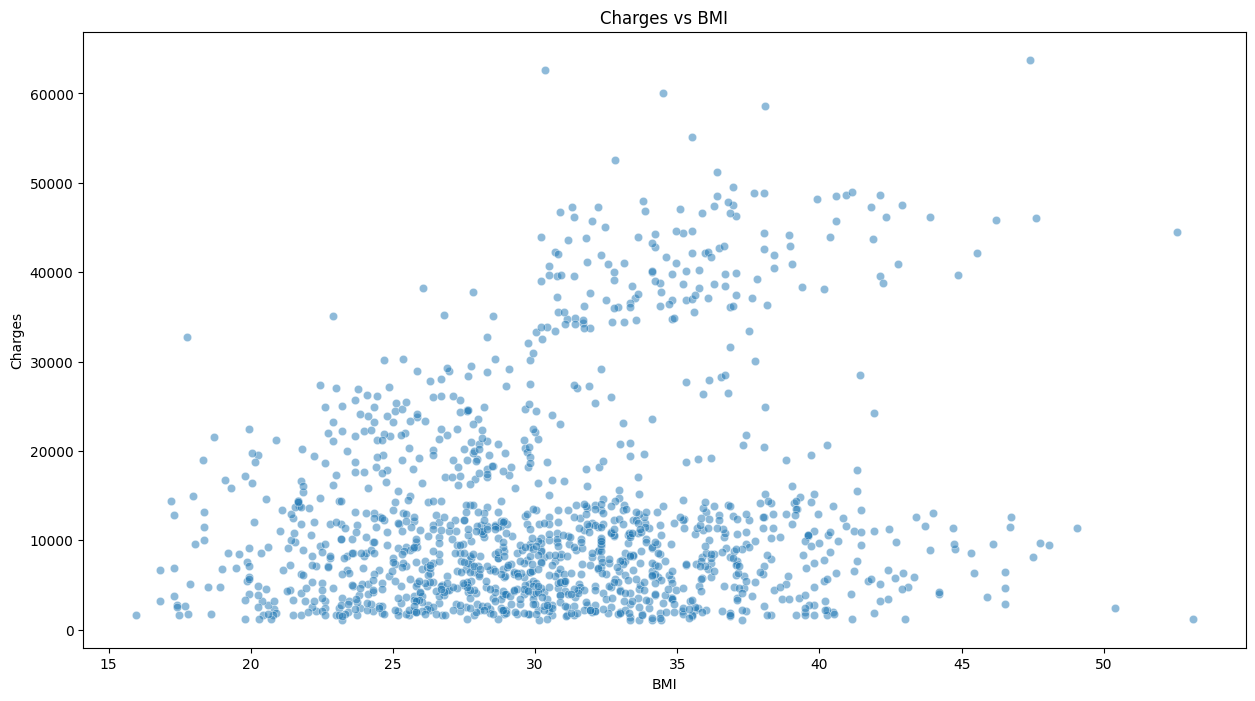

In [ ]:
# set the figure size for the plot
plt.figure(figsize=(15,8))
#assign graph to seaborn scatterplot() method to create a scatter plot to visualize the relationship between 'bmi' and 'charges' in the DataFrame
# x='bmi' to specify the variable to be used for the x-axis
grahp = sns.scatterplot(x='bmi', y='charges', data=dfInsure, alpha=0.5, palette='Set1') # (Waskom, 2024e)
# set the title for the plot
plt.title('Charges vs BMI')
# set the x and y axis labels for the plot
#plt.legend(title='Smoker Status', labels=['Smoker','Non-Smoker'], loc ='upper right')
# set the x and y axis labels for the plot
plt.xlabel('BMI')
plt.ylabel('Charges')


The scatter plot visualises the relationship between charges and BMI for smoking ad non-smoking members.
Within the scatter plot, there no clear linear relationship between BMI and charges. It suggests that members with a higher or lower BMI can incur charges of any rate within the given range. 


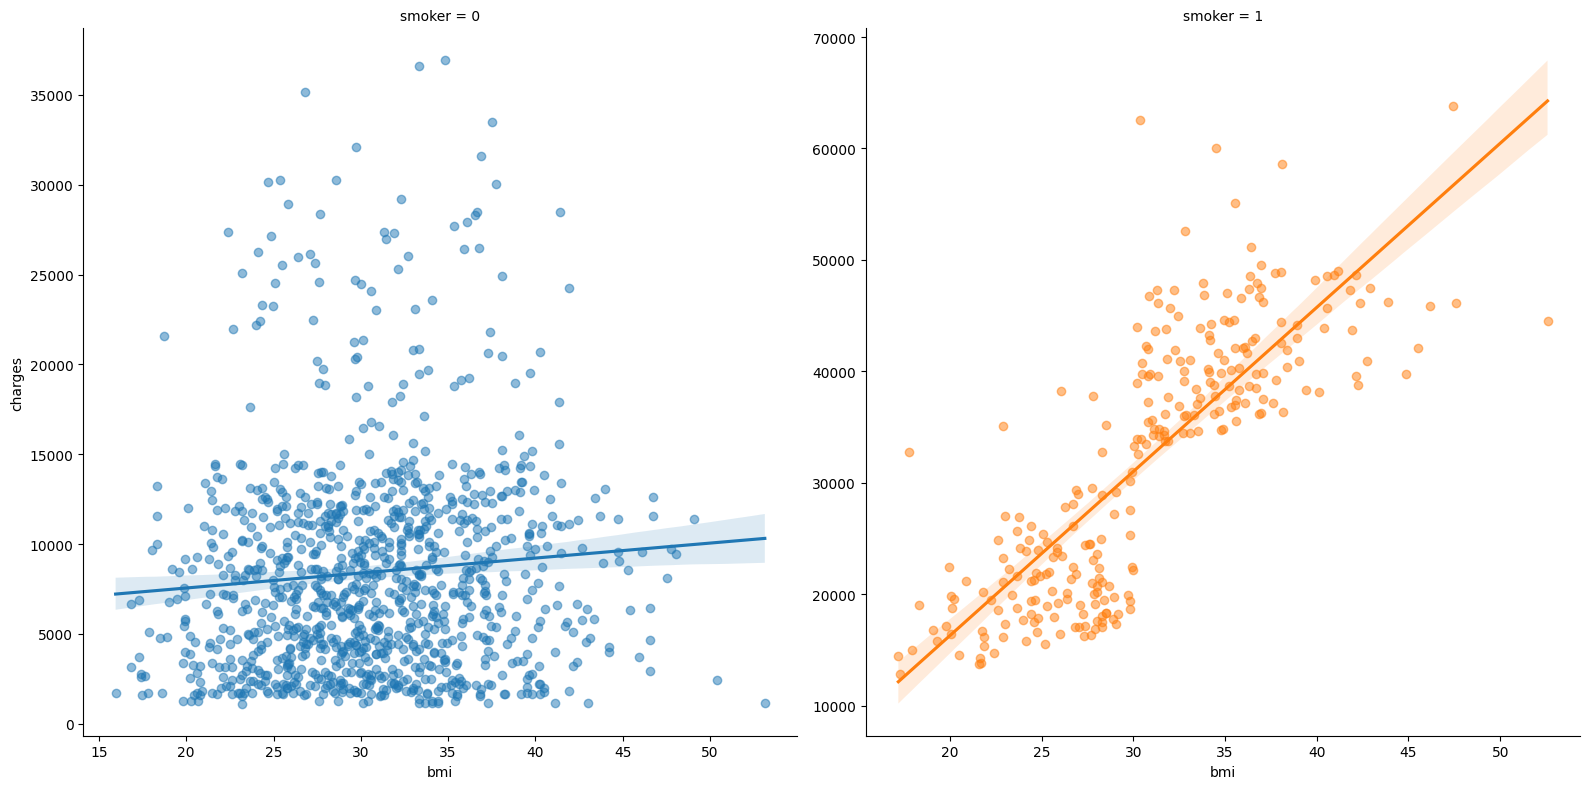

In [ ]:
# seaborn lmplot() method to create a linear regression plot to visualize the relationship between 'BMI' and 'charges' in the DataFrame
# col='smoker' to set  the variable to be used for creating separate subplots for each smoker status
# hue='smoker' to specify the variable to be used for coloring the points in the plot
# height=8 to set the height of the subplots
# scatter_kws=dict( alpha=0.5) to set the transparency of the scatter points
# facet_kws=dict(sharex=False, sharey=False) to set the x and y axis limits for each of the subplots
sns.lmplot(data=dfInsure, x="bmi", y="charges", col="smoker",hue='smoker', height=8,  scatter_kws=dict( alpha=0.5),facet_kws=dict(sharex=False, sharey=False))


By highlighting the smoking status of members, a linear relationship become more clear. There is a postitive relationship between BMI and charges, however the smoking status detemines the degree of influence between the variables.

### **Scatter plot 1: Charge vs BMI of non-smoking members.**
- By plotting a regrssion line, a moderate positive correlation between BMI and charges for non-smoking members is observed. This indicates the insurnace charge for a memeber increases with their BMI. Therefore, overweight and obses members recieve higher charges.

### **Scatter plot 2: Charge vs BMI of smoking members.**
- By plotting a regrssion line, a  stong positive correlation between BMI and charges for smoking members is observed. The plot indicates the insurnace charge for a memeber increases with BMI, however the rates for is more extreme  for members that smoke. Therefore, the combination of smoking and a high BMI results in high insurance rates.  

Text(0, 0.5, 'Density')

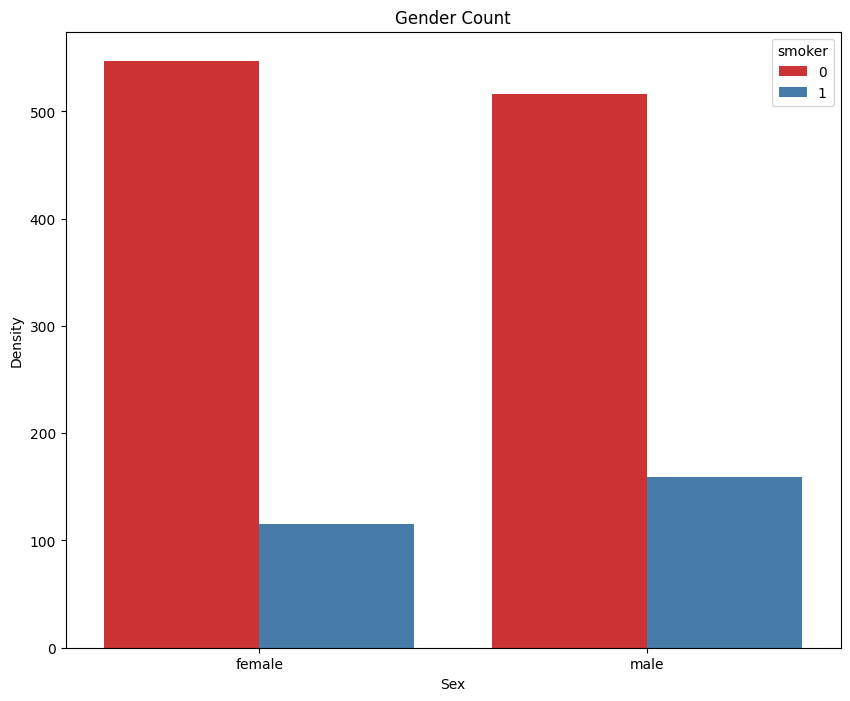

In [ ]:
# set the figure size for the plot
plt.figure(figsize=(10,8))
# graph assigned to seaborn countplot() method to create a count plot to visualize the distribution of  gender by 'smoker' status in the DataFrame
# data = dfInsure to indicate the data to be used for the count
# x = "sex" to set  the variable to be used for the x-axis
# hue = "smoker" to specify the variable to be used for coloring the bars in the count plot
graph = sns.countplot(data=dfInsure, x='sex', palette='Set1', hue='smoker')
plt.title('Gender Count')
plt.xticks([0, 1], ['female','male'])
plt.xlabel('Sex')
plt.ylabel('Density')

The counter plot suggests similar number of females and males within the dataset. Further, the number of females and males members that smoke are proportional.

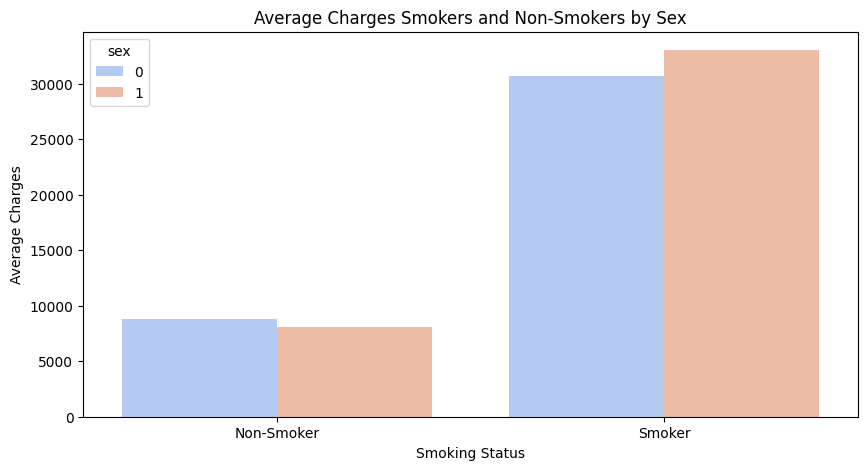

In [ ]:
# assign chargesAvg to the average charges by smoker status  
chargesAvg = dfInsure.groupby(['sex', 'smoker'])['charges'].mean().reset_index()

# Plot the average charges by smoker status
plt.figure(figsize=(10, 5))
# seaborn barplot() method to create a bar plot to visualize the average charges for smokers and non-smokers in the DataFrame
sns.barplot(data=chargesAvg, x='smoker', y='charges', palette ='coolwarm', hue='sex')
plt.xticks([0, 1], ['Non-Smoker','Smoker'])
plt.title('Average Charges Smokers and Non-Smokers by Sex')
plt.ylabel('Average Charges')
plt.xlabel('Smoking Status')
plt.show()

The barplot provides an insight into the distibition of insurance charges for both smokers according to sex.

### **Non-smoker:**
-  For both male and female members, lower insurance charges are incurred by non-smokers

### **Smoker:**
- For both male and female members, higer insurance charges are incurred by smokers

This indicates that there is no significant difference in the charges based on a members sex.


Text(0, 0.5, 'Density')

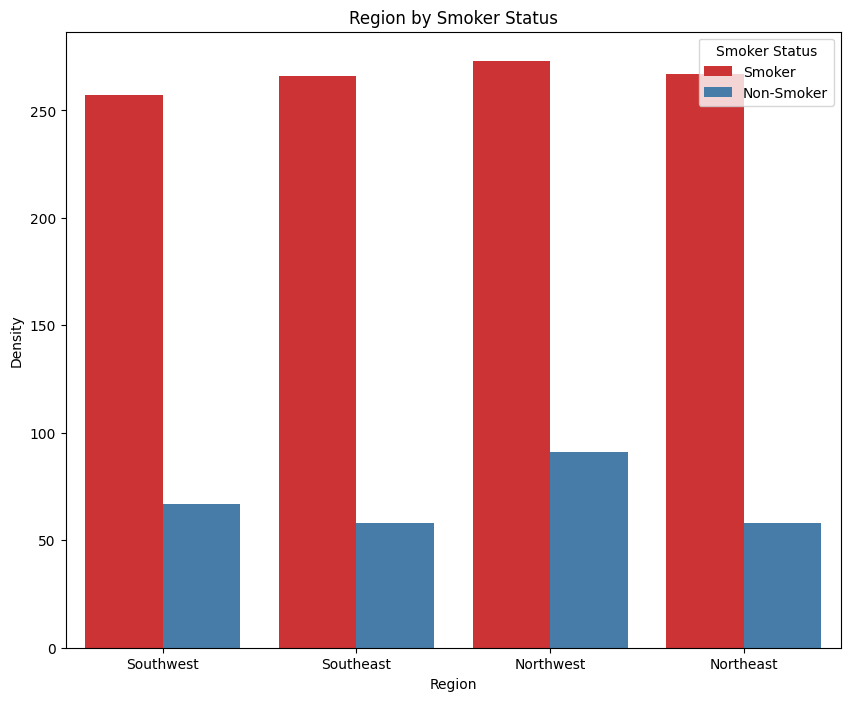

In [ ]:
#graph for cat sex count 
plt.figure(figsize=(10,8))
graph = sns.countplot(data=dfInsure, x='region', hue='smoker', palette='Set1')
plt.title('Region by Smoker Status')
plt.legend(title='Smoker Status', labels=['Smoker','Non-Smoker'], loc='upper right')
plt.xticks([0, 1,2,3], ['Southwest','Southeast','Northwest','Northeast'])
plt.xlabel('Region')
plt.ylabel('Density')

The counter plot suggests similar number of members for each region within the dataset. Further, each region have a proportional number of members that are smokers. 

Text(0.5, 1.0, 'Charges Distribution by Region')

<Figure size 1500x800 with 0 Axes>

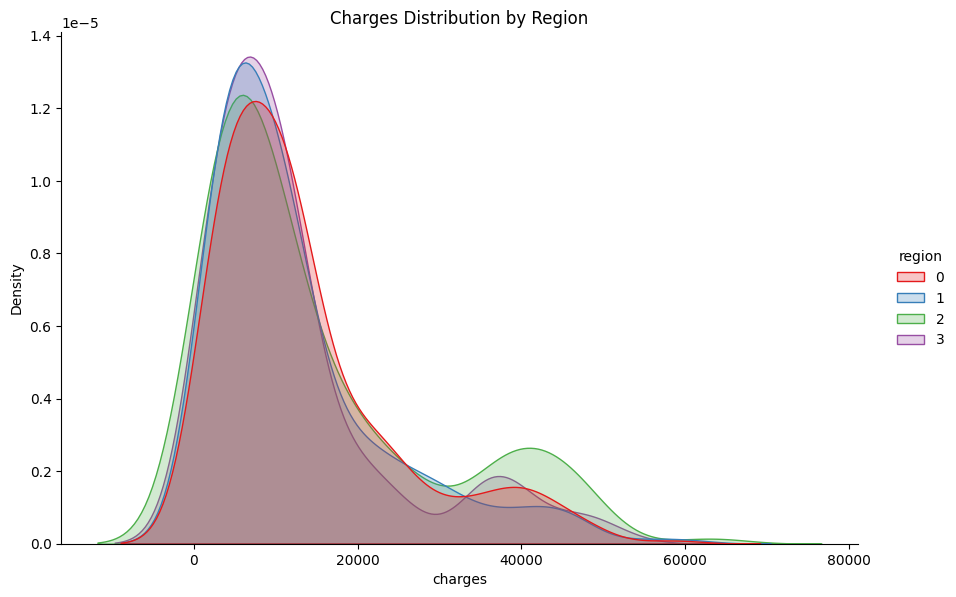

In [ ]:
plt.figure(figsize=(15,8))
# graph = sns.scatterplot(x='sex', y='charges', hue='smoker', data=dfInsure, alpha=0.5, palette='Set1')
# graph = sns.boxplot(x='sex', y='charges', hue='smoker', data=dfInsure, palette='Set1')
sns.displot(data=dfInsure, x='charges', hue='region', fill=True, kind='kde' , height=6, aspect=1.5, palette='Set1')
plt.title('Charges Distribution by Region')


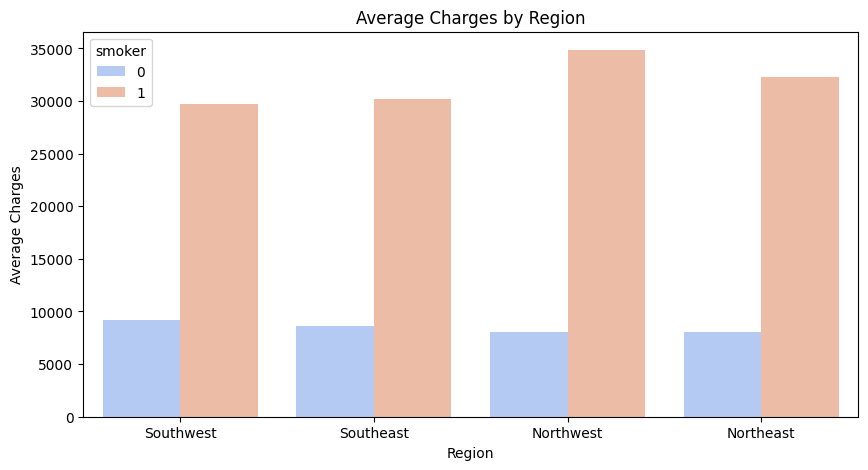

In [ ]:
# mean or median 
chargesAvg = dfInsure.groupby(['region', 'smoker'])['charges'].mean().reset_index()

# Plot the average charges by region
plt.figure(figsize=(10, 5))
sns.barplot(data=chargesAvg, x='region', y='charges', palette ='coolwarm', hue='smoker')
plt.xticks([0, 1,2,3], ['Southwest','Southeast','Northwest','Northeast'])
plt.title('Average Charges by Region')
plt.ylabel('Average Charges')
plt.xlabel('Region')
plt.show()

The barplot provides an insight into the distibition of insurance charges for both smokers according to sex.

### **Non-smoker:**
-  For all regions, lower insurance charges are incurred by non-smokers

### **Smoker:**
-  For all regions, higer insurance charges are incurred by smokers

This indicates that there is no significant difference in the charges based on a members region of a member.

In [ ]:
# before or after encoding ? then won't use numericas
numerics = dfInsure.select_dtypes(include=[np.number])
dfInsure.groupby(['region', ])[numerics.columns].median()

,age,sex,bmi,children,smoker,region,charges
region,,,,,,,
0,39.5,1.0,28.88,1.0,0.0,0.0,10057.652025
1,39.0,0.0,28.88,1.0,0.0,1.0,8976.977250
2,39.0,1.0,33.33,1.0,0.0,2.0,9294.131950
3,39.0,1.0,30.30,1.0,0.0,3.0,8798.593000


### **Pre Processing for Prediction**

In [ ]:
## import skikit-learn packages for machine learning tasks
from sklearn.model_selection import train_test_split # (scikit-learn developers, 2025c)
from sklearn.linear_model import LinearRegression #(scikit-learn developers, 2025b) 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score ##scikit-learn developers, 202c)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler #(scikit-learn developers, 2025e)
import joblib
# Load the dataset again to ensure that the data is clean and ready for machine learning tasks
dfInsure = pd.read_csv('input/insurance.csv')

In [ ]:
# Encode categorical variables into numerical values using LabelEncoder
# This is to prepare the data for machine learning algorithms that require numerical input
encoder = LabelEncoder()
dfInsure.sex = encoder.fit_transform(dfInsure.sex.astype(str))
dfInsure.smoker = encoder.fit_transform(dfInsure.smoker.astype(str))
dfInsure.region = encoder.fit_transform(dfInsure.region.astype(str))
# Display the first 5 rows of the DataFrame to confirm that the categorical variables have been successfully converted to numerical values
dfInsure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:

# Seperate features and target  
dataInsure = dfInsure.values
 #standardize the data
numerical_columns = ['age', 'bmi', 'children']

# Initialize the scaler
scaler = StandardScaler()
scale = MinMaxScaler()

dfInsure[numerical_columns] = scale.fit_transform(dfInsure[numerical_columns])

# Scale the numerical columns
#dfInsure[numerical_columns] = scaler.fit_transform(dfInsure[numerical_columns])

#Split the data into features (X) and target (y)
# all columns except the last one, which are the features
X = dataInsure[:, :-1] 
# last column which is the target variable, charges
y = dataInsure[:, -1] 
#OR 
# X = dfInsure.drop(columns=['charges'])  # Features (exclude the target column)
# y = dfInsure['charges'] 

#list of features names
feature_names = dfInsure.columns[:-1] 
# target_name = dfInsure.columns[-1]


In [ ]:
#import sklearn packages for for feature selection 
from sklearn.feature_selection import SelectKBest, f_regression # (scikit-learn developers, 2025a)

# function to select the best features using SelectKBest
def selectKBest_selection(X, y, k=6): # (Kavya D, 2023)
    # Using f_regression
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit_transform(X, y)
    print("Selected Features: ", selector.get_support(indices=True))  # Get the indices of selected features
    # Print selected features and column names
    selectedFeatures = selector.get_support(indices=True)
    # Get the column names of selected features
    selected_columns = dfInsure.columns[selectedFeatures]
    # Get the scores of selected features
    scores = selector.scores_[selectedFeatures]  
    # Create a DataFrame to display selected features and their scores
    selectedDf = pd.DataFrame({'Feature': selected_columns, 'Score': scores}).sort_values(by='Score', ascending=False)
    # Return the selected features and their scores
    return selectedDf

In [ ]:
# import statsmodels.api to perform backward elimination using OLS regression
import statsmodels.api as sm

# function to perform backward elimination using OLS regression
def backward_elimination(dataF): #(Verma, 2024; GeeksforGeeks, 2025b)
    # dataframe holding features for backward elimination
    data = dataF.drop(columns=['charges'])
    # series holding target (charges) for backward elimination
    target = dataF['charges']

    # list of selected features
    selectedFeatures = data.columns.tolist()
    # list of selected features p-values 
    selectedP_values = []
    while len(selectedFeatures) > 0:
        # DF , Add a constant column for the intercept
        features_with_constant = sm.add_constant(data[selectedFeatures])
        
        # Fit the OLS model
        model = sm.OLS(target, features_with_constant).fit()        
        # Get p-values for features (excluding the constant)
        p_values = model.pvalues[1:]
        selectedP_values.append(p_values)
        
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value >= 0.05:
            excluded_feature = p_values.idxmax()
            selectedFeatures.remove(excluded_feature)            
            #data.drop(columns=[excluded_feature], inplace=True)
            print(f"Removed feature: {excluded_feature} with p-value: {max_p_value:.4f}")
        else:
            break

    # Create a DataFrame to hold the selected features and their p-values
    selectedDf = pd.DataFrame({
                'Feature': selectedFeatures,
                'P-Value': model.pvalues[selectedFeatures]
    }).reset_index(drop=True)
   
   # Return the selected features and their p-values
    return  selectedDf


In [ ]:
#Feature Selection using SelectKBest with f_regression
skFeatures = selectKBest_selection(X, y, k=3)
# most important features
skFeatures.sort_values(by='Score', ascending=True)
skFeatures



Selected Features:  [0 2 4]


,Feature,Score
2,smoker,2177.614868
0,age,131.174013
1,bmi,54.709308


In [ ]:
#Feature Selection using Backward Elimination
eliminationFeatures = backward_elimination(dfInsure)
eliminationFeatures.sort_values(by='P-Value', ascending=True)



Removed feature: sex with p-value: 0.6937


,Feature,P-Value
3,smoker,0.000000e+00
0,age,1.914301e-89
1,bmi,1.487425e-31
2,children,5.223427e-04
4,region,2.010405e-02


In [ ]:
# Assign X to selected features
X = dfInsure[['age', 'smoker', 'bmi',]].values
#create list of selected features names
feature_names = dfInsure[['age', 'smoker', 'bmi']].columns.tolist()
# Split the data into training and testing sets
# 80% for training and 20% for testing
# random_state is used to ensure reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("Train and Test Data Split")  
# print("X_train shape: ", X_train.shape)
# print("X_test shape: ", X_test.shape)
# print("y_train shape: ", y_train.shape)
# print("y_test shape: ", y_test.shape)
print(X)


[[0.02173913 1.         0.3212268 ]
 [0.         0.         0.47914985]
 [0.2173913  0.         0.45843422]
 ...
 [0.         0.         0.56201238]
 [0.06521739 0.         0.26472962]
 [0.93478261 1.         0.35270379]]


## **Bulid Model**

In [ ]:
# instantiate the model
lrModel = LinearRegression()
print("Model Training")
# fit the model to the training data
lrModel.fit(X_train, y_train)



Model Training


LinearRegression()

In [ ]:
print("Model Prediction")
# make predictions on the test data 
# passing the test data to the model to make predictions
prediction = lrModel.predict(X_test)

# Create a DataFrame to output predictions
predictionDf = pd.DataFrame(prediction, columns=['Prediction Charges'])
# Concatenate predictions with test features
testDF = pd.concat([predictionDf, pd.DataFrame(X_test, columns=[feature_names])], axis=1)
# Display the combined DataFrame
testDF
#print(testDF.head())

Model Prediction


,Prediction Charges,"(age,)","(smoker,)","(bmi,)"
0,8184.041468,0.586957,0.0,0.247915
1,7431.001001,0.391304,0.0,0.378262
2,37346.437099,1.000000,1.0,0.293920
3,8629.528305,0.608696,0.0,0.263250
4,27316.654810,0.021739,1.0,0.429379
...,...,...,...,...
263,39765.551050,0.978261,1.0,0.514662
264,12207.642341,0.869565,0.0,0.301587
265,7298.553197,0.434783,0.0,0.324590
266,41452.726068,0.782609,1.0,0.846112


In [ ]:

scoreTest = r2_score(y_test, prediction)
scoreTrain = lrModel.score(X_train, y_train)

print("Model Evaluation : performance metrics")
print("Test R^2 Score: ", scoreTest)
print("Train R^2 Score: ", scoreTrain)
print("Model coefficients: ", lrModel.coef_)
print("Model intercept: ", lrModel.intercept_)
# the average the absolute distance between the predicted and actual values
print("Mean Absolute Error: ", mean_absolute_error(y_test, prediction))
# the average of the squared differences between the predicted and actual values
print("Mean Squared Error: ", mean_squared_error(y_test, prediction))
# the square root of the mean squared error, which gives us the average distance between the predicted and actual values in the same units as the target variable
# RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if we want to use the model for prediction
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, prediction)))

pdanLR = 'PDAN_LR_model'
# save the model to a file using joblib
joblib.dump(lrModel, pdanLR + '.pkl')
# load the model from the file using joblib
loaded_model = joblib.load(pdanLR + '.pkl')

Model Evaluation : performance metrics
Test R^2 Score:  0.7776932310583375
Train R^2 Score:  0.7392286795956206
Model coefficients:  [11932.86941266 23675.37184666 12134.15512912]
Model intercept:  -1828.2729462074312
Mean Absolute Error:  4260.56009109939
Mean Squared Error:  34512843.880227886
Root Mean Squared Error:  5874.763304187488


In [ ]:
from sklearn.linear_model import Ridge, Lasso
# Ridge Regression

ridgeModel = Ridge(alpha=1)
ridgeModel.fit(X_train, y_train)
ridgePredictions = ridgeModel.predict(X_test)
ridgeScore = ridgeModel.score(X_test, y_test)
ridgTrainScore = ridgeModel.score(X_train, y_train)
print("Model Evaluation : performance metrics")
print("Ridge Regression")
print("R^2 Score: ", ridgeScore) 
print("Train R^2 Score: ", ridgTrainScore)   
# the average the absolute distance between the predicted and actual values
print("Mean Absolute Error: ", mean_absolute_error(y_test, ridgePredictions))
# the average of the squared differences between the predicted and actual values
print("Mean Squared Error: ", mean_squared_error(y_test, ridgePredictions))
# the square root of the mean squared error, which gives us the average distance between the predicted and actual values in the same units as the target variable
# RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if we want to use the model for prediction
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, ridgePredictions)))


lasso = Lasso(alpha=23, max_iter=15000)
lasso.fit(X_train, y_train)
lassoPredictions = lasso.predict(X_test)
lassoScore = lasso.score(X_test, y_test)
lassoTrainScore = lasso.score(X_train, y_train)
print("Lasso Regression")
print("R^2 Score: ", lassoScore)
print("Train R^2 Score: ", lassoTrainScore)
# the average the absolute distance between the predicted and actual values
print("Mean Absolute Error: ", mean_absolute_error(y_test, lassoPredictions))
# the average of the squared differences between the predicted and actual values
print("Mean Squared Error: ", mean_squared_error(y_test, lassoPredictions))
# the square root of the mean squared error, which gives us the average distance between the predicted and actual values in the same units as the target variable
# RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if we want to use the model for prediction
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, lassoPredictions)))



Model Evaluation : performance metrics
Ridge Regression
R^2 Score:  0.7775184133785336
Train R^2 Score:  0.7391696294980612
Mean Absolute Error:  4251.318503275896
Mean Squared Error:  34539984.10325979
Root Mean Squared Error:  5877.072749529291
Lasso Regression
R^2 Score:  0.7774832975944534
Train R^2 Score:  0.73904048334058
Mean Absolute Error:  4231.0490483871645
Mean Squared Error:  34545435.78419356
Root Mean Squared Error:  5877.536540438822


## **Model Evaluation**

Text(0, 0.5, 'Actual Charges')

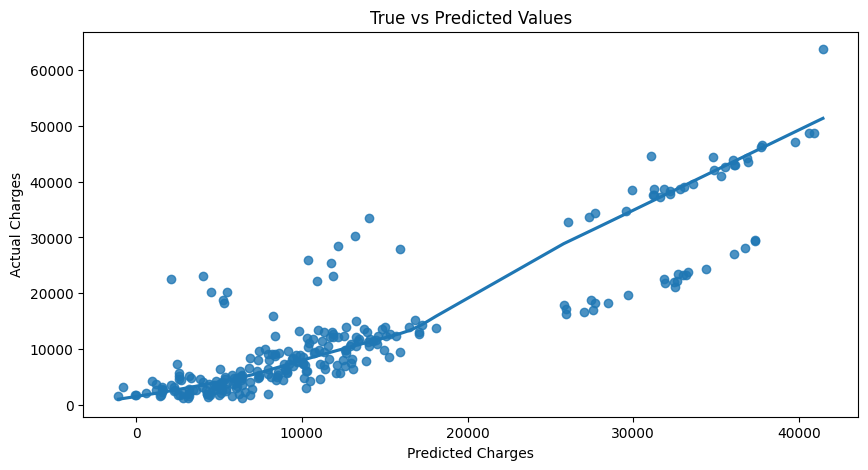

In [ ]:
#Linearity,
# Linearity, Homoscedasticity, Normality of Residuals, Independence of Errors
plt.figure(figsize=(10, 5))

#display the table of preditions and actual values
predictions_df = pd.DataFrame({'Predicted': prediction, 'Actual': y_test})
predictions_df.head(10)

# sns.lmplot(x='Predicted', y='Actual', data=predictions_df, height=5, aspect=2 , truncate=True)
plt.title("True vs Predicted Values")
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')

sns.regplot(x='Predicted', y='Actual', data=predictions_df, ci=None, lowess=True)
plt.title("True vs Predicted Values")
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')

# # Plotting the predicted vs actual values
# plt.figure(figsize=(10, 5))
# plt.scatter(y_test, prediction, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')





Text(0.5, 0, 'Predicted Charges')

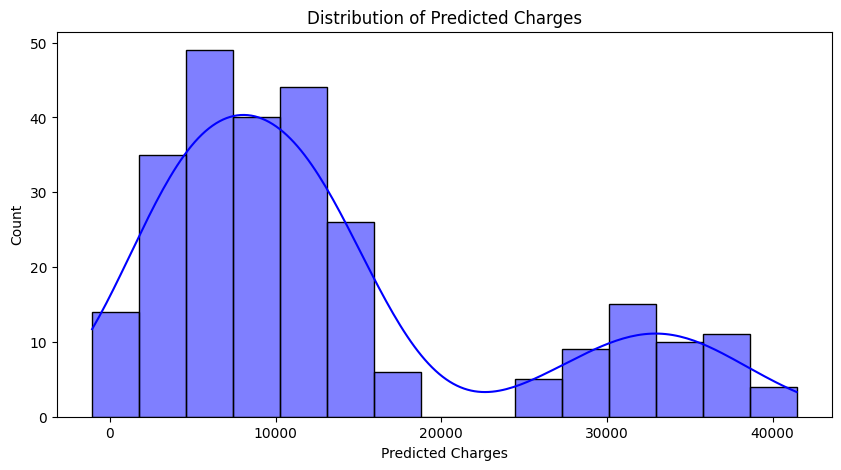

In [ ]:
#normlity of x and y variables
plt.figure(figsize=(10, 5))
sns.histplot(predictions_df['Predicted'], kde=True, color='blue', label='Predicted', alpha=0.5)
plt.title('Distribution of Predicted Charges')
plt.xlabel('Predicted Charges')

In [ ]:
print("Model Evaluation : performance metrics")
# the average the absolute distance between the predicted and actual values
print("Mean Absolute Error: ", mean_absolute_error(y_test, prediction))
# the average of the squared differences between the predicted and actual values
print("Mean Squared Error: ", mean_squared_error(y_test, prediction))
# the square root of the mean squared error, which gives us the average distance between the predicted and actual values in the same units as the target variable
# RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if we want to use the model for prediction
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, prediction)))

#plot the residuals
# plt.figure(figsize=(10, 5))
res = y_test - prediction
res
#redisuals are random, not the average of the errors (Mean Absolute Error), there is no pattern in the residuals, and they are normally distributed around 0


Model Evaluation : performance metrics
Mean Absolute Error:  4260.56009109939
Mean Squared Error:  34512843.880227886
Root Mean Squared Error:  5874.763304187488


array([ 9.11026782e+02, -2.15882520e+03, -8.01545395e+03,  6.72365245e+02,
        6.43363699e+03, -6.58060058e+03,  1.54632032e+03, -3.05801086e+03,
        2.53261719e+03, -1.04712752e+02, -9.45604532e+03, -1.65740556e+03,
       -1.52734287e+03,  8.42551824e+03,  7.78303351e+03,  7.33083243e+03,
       -5.13530540e+03,  6.85213157e+03, -1.14889859e+03, -1.01245007e+04,
        2.50048267e+03, -2.64761303e+03, -1.88877961e+03, -4.23855271e+03,
        6.43098375e+02, -2.04480910e+03, -2.67062409e+03,  1.35843922e+04,
        5.47787542e+02, -1.66928475e+03,  7.59522408e+03, -1.62523422e+03,
       -3.10257926e+03,  3.10624456e+03, -1.92628195e+03, -5.51160441e+03,
        2.39680909e+02, -1.86995041e+03, -9.44648155e+03,  5.91179095e+03,
        2.13032881e+03, -1.59016845e+03, -2.83195744e+03,  2.16169751e+02,
       -3.63333072e+03, -2.40953122e+02, -1.13850457e+03,  1.68145858e+03,
        7.25989214e+03, -4.40313332e+03, -2.59797998e+03, -8.29988367e+02,
        1.62865605e+04,  

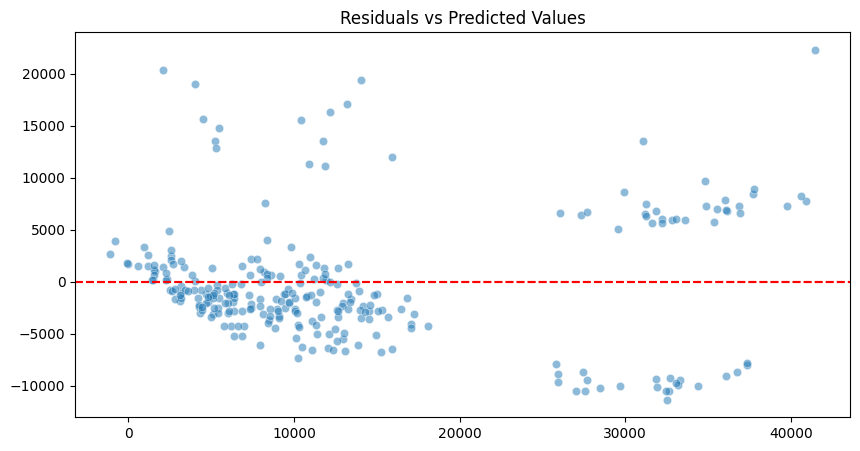

In [ ]:
#homoscedasticity of the residuals , scale-location plot: assess assumption of homoscedasticity equal (constant) variance of the residuals#homoscedasticity of the residuals
plt.figure(figsize=(10, 5))
plt.title('Residuals vs Predicted Values')
sns.scatterplot(x=prediction, y=res, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
# Add horizontal line at 0 (for reference)
plt.axhline(y=0, color='r', linestyle='--', label='Zero line')

# CHAT ---!!!Add lines showing upper and lower residual bounds
# upper_bound = np.percentile(res, 95)
# lower_bound = np.percentile(res, 5)

# plt.axhline(y=upper_bound, color='g', linestyle='--', label='95th percentile (upper bound)')
# plt.axhline(y=lower_bound, color='b', linestyle='--', label='5th percentile (lower bound)')


# mse = (y_test - prediction) ** 2
# plt.figure(figsize=(10, 5))
# plt.title('Residuals vs Predicted Values')
# sns.scatterplot(x=prediction, y=mse, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--')


Text(0.5, 1.0, 'Residuals Distribution')

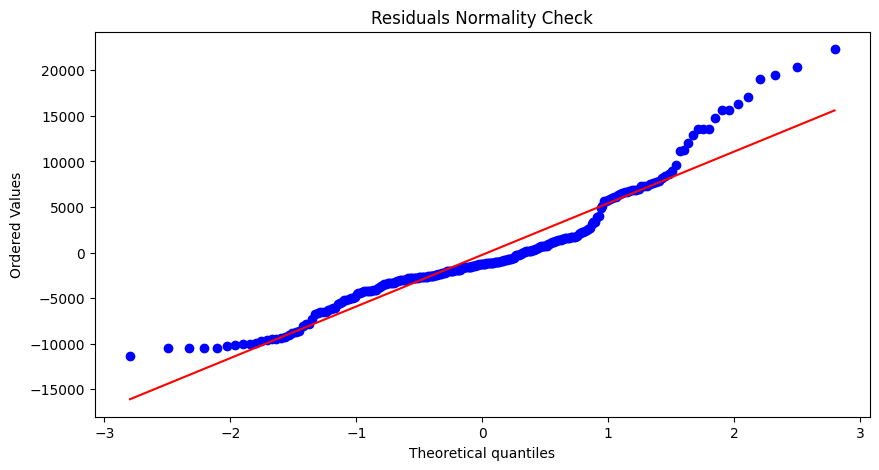

<Figure size 1000x500 with 0 Axes>

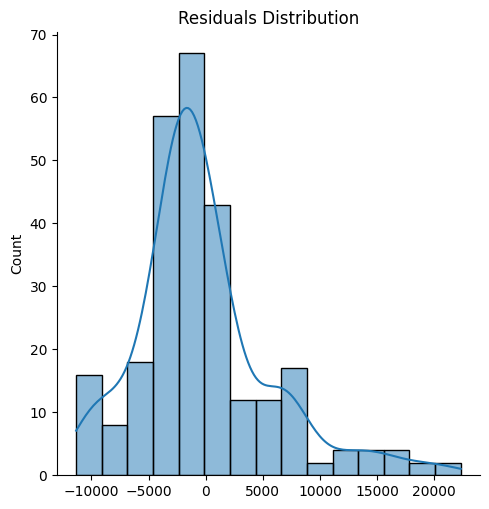

In [ ]:
import scipy.stats as stats
import pylab as pl
#Normal Q-Q Residual Plot, error distribution
plt.figure(figsize=(10, 5))
stats.probplot(res, dist="norm", plot=pl)
plt.title('Residuals Normality Check')


#plot the residuals
plt.figure(figsize=(10, 5))
sns.displot(res, bins=15, kde=True)
plt.title('Residuals Distribution')